# Pandas 
- Dataframe: highly efficient and 2-dimensional data structure
- mix data types (missing data - NaN) 
- row = axis:1 column = axis:0
- data type: object-string/int-integer/float-float/datetime-time/bool-boolean


## 1. Use Pandas reading files

In [3]:
# Pervious method -- take more time and more codes

In [4]:
import csv
def read_csv(filename):
    with open(filename,'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [5]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['acct'])
    return unique_students
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

1237

In [6]:
## Use pandas -- pd.read_csv()

In [7]:
import pandas as pd

In [8]:
daily_engagement = pd.read_csv('daily_engagement.csv')

In [9]:
len(daily_engagement['acct'].unique())

1237

In [10]:
# first 5 rows
daily_engagement.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0


In [11]:
daily_engagement.head(2)

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0


In [12]:
daily_engagement.shape

(136240, 6)

In [13]:
# Selecting a row -- .loc[] 
daily_engagement.loc[2]

acct                              0
utc_date                 2015-01-11
num_courses_visited               2
total_minutes_visited       53.6337
lessons_completed                 0
projects_completed                0
Name: 2, dtype: object

In [14]:
daily_engagement.loc[[2,5,10]]  # double[[]]

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
2,0,2015-01-11,2.0,53.633746,0.0,0.0
5,0,2015-01-14,1.0,151.617577,1.0,0.0
10,0,2015-01-19,1.0,98.327568,1.0,0.0


In [15]:
daily_engagement.iloc[0]   # .iloc[]

acct                              0
utc_date                 2015-01-09
num_courses_visited               1
total_minutes_visited       11.6794
lessons_completed                 0
projects_completed                0
Name: 0, dtype: object

In [16]:
# Select row:loc()  select column:['']

In [17]:
# Selecting individual Column
minutes = daily_engagement['total_minutes_visited']
print minutes.head()

0    11.679374
1    37.284887
2    53.633746
3    33.489270
4    64.779678
Name: total_minutes_visited, dtype: float64


In [18]:
# Selecting multiple Columns
minutes_lessons = daily_engagement[['total_minutes_visited','lessons_completed']]
print minutes_lessons.head(2)

   total_minutes_visited  lessons_completed
0              11.679374                0.0
1              37.284887                0.0


## 2. Pandas Series
- one dimension
- a series is similar to a Numpy array, but with extra functionality


In [19]:
# Data in list format
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries

life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

In [20]:
# Convert Series to a nested list -- .tolist()
gdp.tolist()

[1681.61390973,
 2155.48523109,
 21495.80508273,
 562.98768478,
 13495.1274663,
 9388.68852258,
 1424.19056199,
 24765.54890176,
 27036.48733192,
 1945.63754911,
 21721.61840978,
 13373.21993972,
 483.97086804,
 9783.98417323,
 2253.46411147,
 25034.66692293,
 3680.91642923,
 366.04496652,
 1175.92638695,
 1132.21387981]

In [21]:
# Accessing elements and slicing

print life_expectancy[0]
print gdp[3:6]
    

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [22]:
# Looping
for country_life_expectancy in life_expectancy:
    print 'Examining life expectancy {}'.format(country_life_expectancy)
        

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


In [23]:
# Pandas functions

print life_expectancy.mean()
print life_expectancy.std()
print gdp.max()
print gdp.sum()

72.87
6.21399947487
27036.4873319
182957.59833


In [24]:
# Vectorized operations and index arrays

a = pd.Series([1, 2, 3, 4])
b = pd.Series([1, 2, 1, 2])
  
print a + b
print a * 2
print a >= 3
print a[a >= 3]
   

0    2
1    4
2    4
3    6
dtype: int64
0    2
1    4
2    6
3    8
dtype: int64
0    False
1    False
2     True
3     True
dtype: bool
2    3
3    4
dtype: int64


In [25]:
def varaibles_correlation(variable1, variable2):
    both_above = (variable1 > variable1.mean()) & \
                 (variable2 > variable2.mean())
    both_below = (variable1 < variable1.mean()) & \
                 (variable2 < variable2.mean())
    is_same_direction = both_above | both_below
    num_same_direction = is_same_direction.sum()
    num_difference_direction = len(variable1) - num_same_direction
    
    return (num_same_direction,num_difference_direction)

varaibles_correlation(life_expectancy,gdp)  # call the function      

# indicate the two variables are positively correlated

(17, 3)

In [26]:
# .describe() function to give the overall statistics 
gdp.describe()

count       20.000000
mean      9147.879916
std       9763.958973
min        366.044967
25%       1362.124518
50%       2967.190270
75%      15495.296870
max      27036.487332
dtype: float64

In [28]:
import pandas as pd

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina']


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076]

# Employment data in 2007 for 20 countries


In [29]:
# set index for pairing two lists
employment = pd.Series(employment_values, index=countries)
print employment.head()

Afghanistan    55.700001
Albania        51.400002
Algeria        50.500000
Angola         75.699997
Argentina      58.400002
dtype: float64


In [30]:
def max_employment(employment):
    max_country = employment.argmax()
    max_value = employment.loc[max_country]
    return (max_country, max_value)
# .argmax(): return the index where the maximum value occured

max_employment(employment)
    

('Angola', 75.699996949999999)

### Index:  the benefits of Using Pandas series instead of NumPy array

In [31]:
# Addition when indexes are the same
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print s1 + s2

a    11
b    22
c    33
d    44
dtype: int64


In [32]:
# Indexes have same elements in a different order
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
print s1 + s2

a    31
b    12
c    43
d    24
dtype: int64


In [33]:
# Indexes overlap, but do not have exactly the same elements
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
sum_result = s1 + s2
print sum_result

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64


In [34]:
# Indexes do not overlap
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
print s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


### Filling Missing Values

In [35]:
# Googling -- .dropna()
sum_result.dropna()

c    13.0
d    24.0
dtype: float64

In [36]:
# alternate solution: Treating missing values as 0 before the addition

In [37]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
s1.add(s2,fill_value=0)
# Use .add / fill_value

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64

### apply() function 
- perform computation that aren't built into Pandas
- takes a series and a function, and return a new series

In [38]:
states = pd.Series(['California','OH','Michigan','NY'])
# I want: 'CA','OH','MI','NY'

In [39]:
def clean_state(state):
    if len(state) == 2:
        return state
    elif state == 'California':
        return 'CA'
    elif state == 'Michigan':
        return 'MI'
       # ...

In [40]:
clean_states = []    # Option1: loop
for state in states:
    clean_states.append(clean_state(state))
clean_states = pd.Series(clean_states)

In [41]:
clean_states = states.apply(clean_state) # Option2: .apply()

In [42]:
# Practice reverse_name:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
])

In [43]:
def reverse_name(name):
    split_name = name.split(' ')
    first_name = split_name[0]
    last_name = split_name[1]
    return last_name + ',' + first_name
print reverse_name(names.iloc[0])

# split() cannot use in Series, so need to use in one varaible

Agassi,Andre


In [44]:
def reverse_names(names):
    return names.apply(reverse_name)
print reverse_names(names)

# then use .apply() to apply to the series

0            Agassi,Andre
1             Bonds,Barry
2    Columbus,Christopher
3            Defoe,Daniel
4          Estevez,Emilio
5         Flintstone,Fred
6             Garbo,Greta
7         Humbert,Humbert
dtype: object


### Plotting in Pandas
- if data is NumPy array or Pandas Series
- the code below can create a histogram of the data

Populating the interactive namespace from numpy and matplotlib


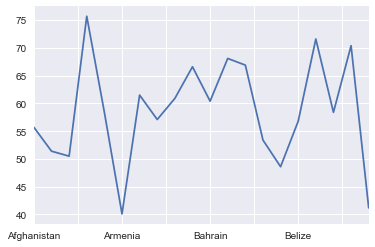

In [45]:
import seaborn as sns
%pylab inline  
# only needed in Ipython (%pylab inline)
employment.plot()

## 3. Pandas DataFrame -- two-dimensional data

In [46]:
import pandas as pd
enrollments_df = pd.DataFrame({
    'account_key':[448,448,448,448,448],
    'status': ['canceled','canceled','canceled','canceled','canceled'],
    'join_data':['2014-11-10','2014-11-05','2015-01-27','2014-11-10','2015-03-10'],
    'days_to_cancel':[65,5,0,0,np.nan],
    'is_udacity':[True,True,True,True,True]
})

In [69]:
enrollments_df

,account_key,days_to_cancel,is_udacity,join_data,status
0,448,65.0,True,2014-11-10,canceled
1,448,5.0,True,2014-11-05,canceled
2,448,0.0,True,2015-01-27,canceled
3,448,0.0,True,2014-11-10,canceled
4,448,NaN,True,2015-03-10,canceled


In [47]:
enrollments_df.mean()

account_key       448.0
days_to_cancel     17.5
is_udacity          1.0
dtype: float64

In [48]:
enrollments_df.values  # convert to NumPy array

array([[448, 65.0, True, '2014-11-10', 'canceled'],
       [448, 5.0, True, '2014-11-05', 'canceled'],
       [448, 0.0, True, '2015-01-27', 'canceled'],
       [448, 0.0, True, '2014-11-10', 'canceled'],
       [448, nan, True, '2015-03-10', 'canceled']], dtype=object)

In [50]:
# Create DataFrame: data/index/columns

In [51]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)
print ridership_df

          R003  R004  R005  R006  R007
05-01-11     0     0     2     5     0
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613
05-05-11  1608  4802  3932  4477  2705
05-06-11  1576  3933  3909  4979  2685
05-07-11    95   229   255   496   201
05-08-11     2     0     1    27     0
05-09-11  1438  3785  3589  4174  2215
05-10-11  1342  4043  4009  4665  3033


In [52]:
# create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print df_1

   A  B
0  0  3
1  1  4
2  2  5


In [53]:
# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print df_2

   A  B  C
0  0  1  2
1  3  4  5


In [54]:
# Accessing elements
print ridership_df.iloc[0]

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64


In [55]:
print ridership_df.loc['05-05-11']

R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64


In [56]:
print ridership_df['R003']

05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64


In [57]:
print ridership_df.iloc[1, 3]

2328


In [58]:
# Accessing multiple rows
print ridership_df.iloc[1:4]

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


In [59]:
# Accessing multiple columns
print ridership_df[['R003', 'R005']]

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


### Pandas Axis Names
- Instead of axis=0 or axis=1, you can use axis='index' or axis='columns'
- But! axis='index' means columns & axis='columns' means rows!!!
- Test it before using

In [60]:
# Pandas axis
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print df.sum()

A     3
B    12
dtype: int64


In [61]:
print df.sum(axis=1)

0    3
1    5
2    7
dtype: int64


In [62]:
print df.values.sum()

15


In [63]:
ridership_df.mean()
# calculte the mean of each column

R003    1071.2
R004    2814.9
R005    2718.8
R006    3239.9
R007    1868.2
dtype: float64

In [64]:
# Pandas cannot directly calculate the overall mean of the dataframe
ridership_df.values.mean()

2342.5999999999999

### Calculating Correlation

In [65]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [66]:
# correlation = average of (x in standard units)*(y in standard units)
# Remember to pass the argument "ddof=0" to the Pandas std() function!

In [67]:
def correlation(x,y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()

In [68]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['meanprecipi'])

0.035648515772244052

In [69]:
correlation(subway_df['ENTRIESn_hourly'], subway_df['ENTRIESn'])

0.58589547076620752

### DataFrame Vectorized Operations
- similar to vectorized operations for 2D NumPy arrays
- match up elements by index and column name rather than position

### df.applymap() -- apply the function to entire DataFrame

In [70]:
# Practice: Data
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
print grades_df.head()

        exam1  exam2
Andre      43     24
Barry      81     63
Chris      78     56
Dan        75     56
Emilio     89     67


In [73]:
def convert_grade(grade):
    if grade >=90:
        return 'A'
    elif grade >=80: 
        return 'B'
    elif grade >=70:
        return 'C'
    elif grade >=60:
        return 'D'
    else:
        return 'F'
convert_grade(45)


'F'

In [75]:
def convert_grades(grades):
    return grades_df.applymap(convert_grade)
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


### df.apply() 

In [80]:
# Use 1: apply the function from one column to another column

In [79]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grades_curve(exam_grades):
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
print convert_grades_curve(grades_df['exam1'])
    
# qcut() does not work on DataFrames, but we can use apply() to call the function on each column separately
print grades_df.apply(convert_grades_curve)
    

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [81]:
# Use 2: take in one column and return just a single value

In [85]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

print df.apply(np.max)
print df.max()
# actually, return the same

a     5
b    50
c    25
dtype: int64
a     5
b    50
c    25
dtype: int64


In [86]:
# find the second largest 

In [88]:
# googling: pandas sort series
def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc[1]
second_largest_in_column(df['a'])

4

In [89]:
def second_largest(df):
    return df.apply(second_largest_in_column)
second_largest(df)

a     4
b    40
c    20
dtype: int64

### Adding a DataFrame to a Series

In [90]:
# Adding a Series to a square DataFrame

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })

print df + s  # adding as columns

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [91]:
# Adding a Series to a one-row DataFrame 

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
print df
print '' # Create a blank line between outputs
print df + s

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [92]:
# Adding a Series to a one-column DataFrame

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
    
print df
print '' # Create a blank line between outputs
print df + s
    

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [94]:
# Adding when DataFrame column names match Series index

s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
print df
print '' # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [95]:
# Adding when DataFrame column names don't match Series index

s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
print df
print '' # Create a blank line between outputs
print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### df.groupby()

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Examine DataFrame
print example_df

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [97]:
# Examine groups
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
print grouped_data.groups

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}


In [98]:
# Group by multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print grouped_data.groups

{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}


In [99]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print grouped_data.sum()

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [101]:
# Limit columns in result
grouped_data = example_df.groupby('even')
print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


In [102]:
# Practice: subway_data groupby

In [106]:
subway_df = pd.read_csv('nyc_subway_weather.csv')
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [107]:
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [112]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
# select only 'ENTRIESn_hourly'

Populating the interactive namespace from numpy and matplotlib


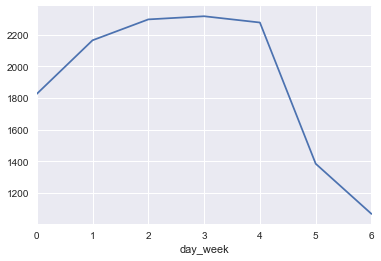

In [113]:
%pylab inline
ridership_by_day.plot()

### Combining Pandas DataFrames

In [22]:
# dataset 1: subway_df

In [23]:
import pandas as pd
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

In [24]:
# dataset 2: weather_df

In [25]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [17]:
subway_df.merge(weather_df, on=['DATEn','hour','latitude','longitude'],
                           how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [21]:
# If different column names (DATEn = date), can use left on + right on
subway_df.merge(weather_df,
                left_on =['DATEn','hour','latitude','longitude'],
                right_on= ['date','hour','latitude','longitude'],
                how = 'inner')


,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,date,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,05-01-11,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,05-02-11,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,05-03-11,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,05-04-11,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,05-05-11,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,05-01-11,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,05-02-11,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,05-03-11,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,05-04-11,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,05-05-11,0,30.01,0,48.9,15.0


### Groupby() with/without as_index

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


In [ ]:
# groupby() without as_index

first_even = example_df.groupby('even').first()
print first_even
print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame

In [29]:
# groupby() with as_index=False

first_even = example_df.groupby('even', as_index=False).first()
print first_even
print first_even['even'] # Now 'even' is still a column in the DataFrame

    even above_three  value
0  False       False      1
1   True       False      2
0    False
1     True
Name: even, dtype: bool


### Three-Dimensional Data
- NumPy arrays can have arbitrarily many dimensions. 
- Just like you can create a 1D array from a list, and a 2D array from a list of lists, you can create a 3D array from a list of lists of lists, and so on. For example, the following code would create a 3D array:

In [35]:
a = np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])

In [36]:
a.shape

(2, 2, 3)